In [23]:
import os
import pandas as pd
import glob
from pil import Image
%matplotlib inline

ModuleNotFoundError: No module named 'pil'

In [2]:
data_dir = "/Users/robin/Kaggle/best-artworks-of-all-time/"

In [3]:
os.listdir(data_dir)

['resized', '.DS_Store', 'images', 'artists.csv']

The csv contains some general info about the artists

In [4]:
df = pd.read_csv(data_dir + 'artists.csv', index_col=0)

In [5]:
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings
id,,,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


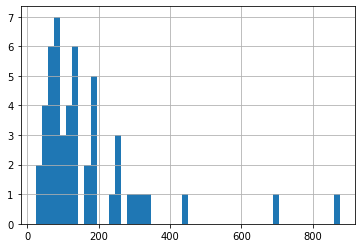

In [6]:
df['paintings'].hist(bins=50)

most artists have fewer than 200 paintings, whilst a couple have very large numbers

In [7]:
df['genre'].value_counts()

Post-Impressionism                         4
Baroque                                    4
Northern Renaissance                       4
Impressionism                              4
High Renaissance                           3
Romanticism                                3
Impressionism,Post-Impressionism           2
Surrealism                                 2
Primitivism                                2
Symbolism,Expressionism                    1
Pop Art                                    1
Proto Renaissance                          1
Expressionism                              1
Abstract Expressionism                     1
Cubism                                     1
Mannerism                                  1
Suprematism                                1
Surrealism,Impressionism                   1
High Renaissance,Mannerism                 1
Symbolism                                  1
Byzantine Art                              1
Symbolism,Art Nouveau                      1
Primitivis

An artists can be in more than 1 genre

In [8]:
impressionists = df[(df['genre'] == 'Impressionism') | 
                    (df['genre'] == 'Realism,Impressionism') |
                    (df['genre'] == 'Impressionism,Post-Impressionism') |
                    (df['genre'] == 'Surrealism,Impressionism')]
impressionists

,name,years,genre,nationality,bio,wikipedia,paintings
id,,,,,,,
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336
20,Alfred Sisley,1839 - 1899,Impressionism,"French,British",Alfred Sisley (; French: [sislɛ]; 30 October 1...,http://en.wikipedia.org/wiki/Alfred_Sisley,259
28,Henri Matisse,1869 - 1954,"Impressionism,Post-Impressionism",French,Henri Émile Benoît Matisse (French: [ɑ̃ʁi emil...,http://en.wikipedia.org/wiki/Henri_Matisse,186
30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702
35,Camille Pissarro,1830 - 1903,"Impressionism,Post-Impressionism",French,Camille Pissarro (French: [kamij pisaʁo]; 10 J...,https://en.wikipedia.org/wiki/Camille_Pissarro,91


TODO: Compare Degas & Renoir as painting at the same time and high number of images

## Images

In [9]:
len(df['name'].unique())

50

The actual images are in `images/`

In [10]:
images_dir = glob.glob(data_dir + "images/*")

In [11]:
len(images_dir)

50

In [12]:
images_dir[:5]

['/Users/robin/Kaggle/best-artworks-of-all-time/images/Piet_Mondrian',
 '/Users/robin/Kaggle/best-artworks-of-all-time/images/Diego_Velazquez',
 '/Users/robin/Kaggle/best-artworks-of-all-time/images/Edgar_Degas',
 '/Users/robin/Kaggle/best-artworks-of-all-time/images/Georges_Seurat',
 '/Users/robin/Kaggle/best-artworks-of-all-time/images/Francisco_Goya']

There are underscores in the names of the artists in images

In [13]:
artists = [entry.split("/")[-1] for entry in images_dir]

In [14]:
print(artists[0], len(glob.glob(data_dir + f"images/{artists[0]}/*")))

Piet_Mondrian 85


In [15]:
images_ = {}

for artist in artists:
    images_[artist] = len(glob.glob(data_dir + f"images/{artist}/*"))

In [16]:
ds = pd.Series(images_)

In [17]:
ds.sort_values(ascending=False)

Vincent_van_Gogh             878
Edgar_Degas                  703
Pablo_Picasso                440
Pierre-Auguste_Renoir        337
Albrecht_Dürer              329
Paul_Gauguin                 312
Francisco_Goya               292
Rembrandt                    263
Alfred_Sisley                260
Titian                       256
Marc_Chagall                 240
Rene_Magritte                195
Amedeo_Modigliani            194
Paul_Klee                    189
Henri_Matisse                187
Andy_Warhol                  182
Mikhail_Vrubel               172
Sandro_Botticelli            165
Leonardo_da_Vinci            144
Peter_Paul_Rubens            142
Salvador_Dali                140
Hieronymus_Bosch             138
Pieter_Bruegel               135
Diego_Velazquez              129
Kazimir_Malevich             127
Frida_Kahlo                  121
Giotto_di_Bondone            120
Gustav_Klimt                 118
Raphael                      110
Joan_Miro                    103
Andrei_Rub

## Resized images

In [18]:
resized = glob.glob(data_dir + "resized/*")

In [20]:
resized[0]

'/Users/robin/Kaggle/best-artworks-of-all-time/resized/Gustav_Klimt_113.jpg'